# Real-Time Focus Monitor
Download VLC media player onto your device (https://www.videolan.org/vlc/)

In [1]:
#IMPORT LIBRARIES
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install scipy
!{sys.executable} -m pip install python-vlc
!{sys.executable} -m pip install keyboard

import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
from scipy import signal
import vlc
import time
import random
import os
import keyboard

print("\nDone!")


Done!


Start


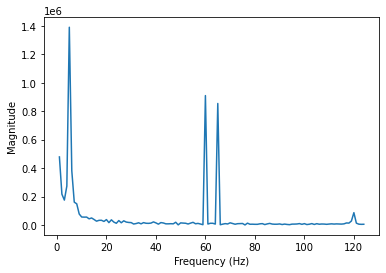

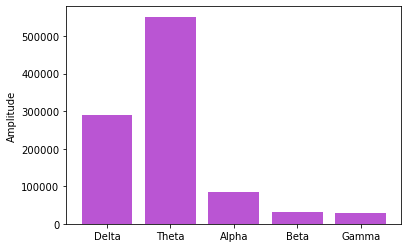

Theta
You are in FLOW!


AttributeError: 'NoneType' object has no attribute 'media_player_new'

<Figure size 432x288 with 0 Axes>

In [3]:
#START TIMER
print("Start")
total_start_time = time.time()

flow_counter = 0

while True:

        #IMPORT DATA - *LIVE DATA INPUT GOES HERE - call it channelData*
        channelData = []
        with open("data/withoutPowerline.csv", "r") as data:
            for line in data:
                line = line.split(",")
                channelData.append(float(line[0]))

        for point in range(len(channelData)):
            if(point%2 != 0):
                channelData[point] = channelData[point-1]

        #FFT
        fftData = np.fft.fft(channelData)
        freq = np.fft.fftfreq(len(channelData))*250

        #REMOVE SYMMETRIC NEGATIVE DATA
        fftData = fftData[1:int(len(fftData)/2)]
        freq = freq[1:int(len(freq)/2)]

        #FFT FORMULA WITH IMAGONARY COMPONENT
        fftData = np.sqrt(fftData.real**2 + fftData.imag**2)

        #REMOVE UPPER FREQUENCIES
        freq = freq[0:50000]
        fftData = fftData[0:50000]

        #FREQUENCY DOMAIN PLOT
        plt.plot(freq, fftData)
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("Magnitude")
        plt.show()
        plt.clf()

        #DEFINE BINS FOR BRAINWAVE TYPES
        bandTotals = [0,0,0,0,0]
        bandCounts = [0,0,0,0,0]

        for point in range(len(freq)):
            if(freq[point] < 4):
                bandTotals[0] += fftData[point]
                bandCounts[0] += 1
            elif(freq[point] < 8):
                bandTotals[1] += fftData[point]
                bandCounts[1] += 1
            elif(freq[point] < 12):
                bandTotals[2] += fftData[point]
                bandCounts[2] += 1
            elif(freq[point] < 30):
                bandTotals[3] += fftData[point]
                bandCounts[3] += 1
            elif(freq[point] > 30):
                bandTotals[4] += fftData[point]
                bandCounts[4] += 1

        #SAVE AVG OF ALL POINTS 
        bands = list(np.array(bandTotals)/np.array(bandCounts))

        #BAR GRAPH WITH BRAINWAVE BINS
        def plotBands(bands):
            binNames = ["Delta", "Theta", "Alpha", "Beta", "Gamma"]
            plt.ylabel("Amplitude")
            plt.bar(binNames, bands, color="mediumorchid")
            plt.show()
            plt.clf()

        plotBands(bands)

        #IDENTIFY MOST PREVALENT WAVE TYPE
        waveType = {
            bands[0]:"Delta",
            bands[1]:"Theta",
            bands[2]:"Alpha",
            bands[3]:"Beta",
            bands[4]:"Gamma",}

        max_waveType = waveType[max(bands)]
        print(waveType[max(bands)])
#         max_waveType = waveType[bands[2]] #use this to test

        #COMPARE MAX WAVE TYPE TO FLOW STATE (Alpha or Theta) vs TOO HYPER (Gamma or Beta) vs TOO RELAXED (Delta)

        if max_waveType == (waveType[bands[1]]) or max_waveType == (waveType[bands[2]]): #is most prevalent wave type alpha or theta?
            
            # Start Flow Time
            flow_start_time = time.time()

            print("You are in FLOW!")

            #Play Flow Music
            player = vlc.MediaPlayer(r"C:\Users\Mateo\Desktop\Neurotech\NatHacks\LastMinuteHealth\Music" + random.choice(os.listdir(r"C:\Users\Mateo\Desktop\Neurotech\NatHacks\LastMinuteHealth\Music\Chill music")))
            player.play()
            time.sleep(10)
            player.stop()

            # End Flow Timer
            flow_end_time = time.time()
            flow_duration = (flow_end_time - flow_start_time)/60 #converts seconds to minutes
            flow_counter = flow_counter + flow_duration
            
            if keyboard.is_pressed('esc'):
                print('Done Working!')
                total_end_time = time.time()
                print("Work Summary")
                print("--------------------")
                total_duration = (total_end_time - total_start_time)/60 #converts second 
                print("You spent " + str("%.2f" % flow_counter) + " minutes of " + str("%.2f" % total_duration) + " minutes in the FLOW state.")
                break

            else:
                total_end_time = time.time()
                total_duration = (total_end_time - total_start_time)/60 #converts second 
                print("You spent " + str("%.2f" % flow_counter) + " minutes of " + str("%.2f" % total_duration) + " minutes in the FLOW state. Keep going!")
                continue

        elif max_waveType == waveType[bands[0]]: #is most prevalent wave type delta?

            print("You are not in FLOW.")

            player = vlc.MediaPlayer(r"C:\Users\Mateo\Desktop\Neurotech\NatHacks\LastMinuteHealth\Music" + random.choice(os.listdir(r"C:\Users\Mateo\Desktop\Neurotech\NatHacks\LastMinuteHealth\Music\Hype music")))
            player.play()
            time.sleep(10)
            player.stop()
            
            if keyboard.is_pressed('esc'):
                print('Done Working!')
                total_end_time = time.time()
                print("Work Summary")
                print("--------------------")
                total_duration = (total_end_time - total_start_time)/60 #converts second 
                print("You spent " + str("%.2f" % flow_counter) + " minutes of " + str("%.2f" % total_duration) + " minutes in the FLOW state.")
                break

            else:
                total_end_time = time.time()
                total_duration = (total_end_time - total_start_time)/60 #converts second 
                print("You spent " + str("%.2f" % flow_counter) + " minutes of " + str("%.2f" % total_duration) + " minutes in the FLOW state. Keep going!")
                continue

        elif max_waveType == (waveType[bands[3]]) or max_waveType == (waveType[bands[4]]): #is most prevalent wave type beta or gamma?

            print("You are not in FLOW.")

            player = vlc.MediaPlayer(r"C:\Users\Mateo\Desktop\Neurotech\NatHacks\LastMinuteHealth\Music" + random.choice(os.listdir(r"C:\Users\Mateo\Desktop\Neurotech\NatHacks\LastMinuteHealth\Music\Relax music")))
            player.play()
            time.sleep(10)
            player.stop()
            
            if keyboard.is_pressed('esc'):
                print('Done Working!')
                total_end_time = time.time()
                print("Work Summary")
                print("--------------------")
                total_duration = (total_end_time - total_start_time)/60 #converts second 
                print("You spent " + str("%.2f" % flow_counter) + " minutes of " + str("%.2f" % total_duration) + " minutes in the FLOW state.")
                break

            else:
                total_end_time = time.time()
                total_duration = (total_end_time - total_start_time)/60 #converts second 
                print("You spent " + str("%.2f" % flow_counter) + " minutes of " + str("%.2f" % total_duration) + " minutes in the FLOW state. Keep going!")
                continue
